<a href="https://colab.research.google.com/github/Fru-Adey/Image-Processing-for-deep-learning/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Introduction to Computer Vision 

In [1]:
## Image Manipulation and modeling

In [3]:
# Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import cv2

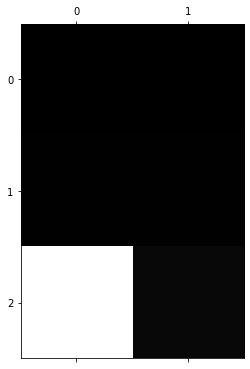

In [4]:
#practice constructing a 2 dimensional image
img = np.array([[0,0],[1,1],[255,8]])
plt.matshow(img, cmap='gray')
#img

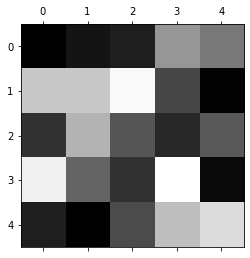

In [5]:
# create a 5*5 image using grayscale (i demensional)
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])
plt.matshow(tiny_image, cmap='gray')

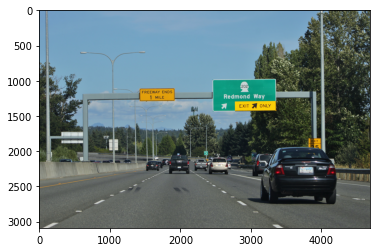

In [6]:
#reading a jpg image 
image = mpimg.imread('images/wa_state_highway.jpg')
plt.imshow(image)

### RGB CHANNELS

#visualize the levels of each color channel. paying close attention to traffic signs.

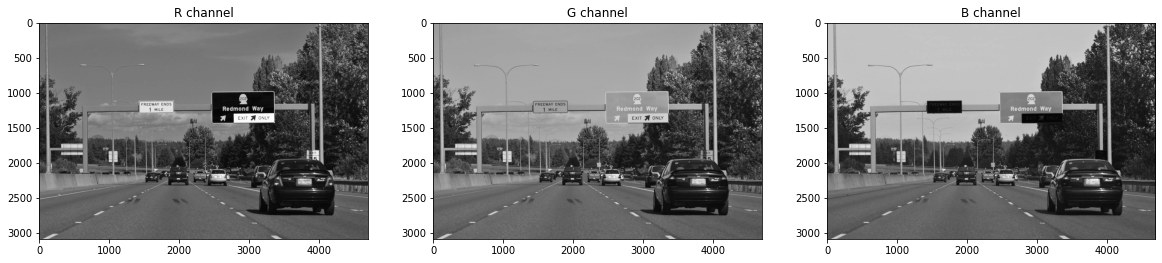

In [7]:
# Isolate RGB channels
r = image [:, :,0]
g = image[:, :, 1]
b = image[:, :, 2]

#visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## we can see clearly the area having the lowest value for red

### Color Threshold 

In [10]:
# here we read the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Here we print a type of image and its dimensions ( hidht, width and the color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


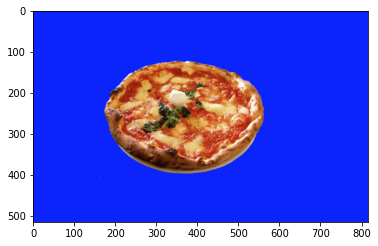

In [13]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Defining a color threshold

In [ ]:
# we wish to define boundaries using RGB color values and tweek this values to completely isolate the background

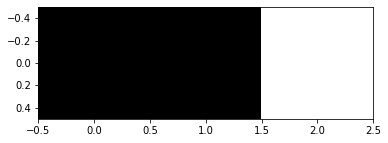

In [16]:
lower_blue = np.array([0,0,200]) 
upper_blue = np.array([250,250,255])

In [17]:
### Creat a mask

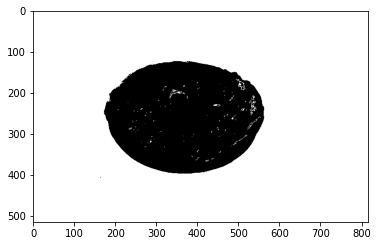

In [20]:
# the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

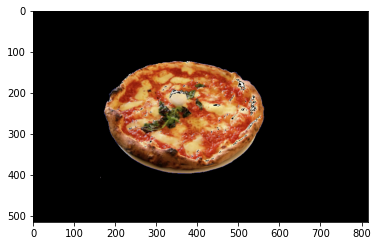

In [21]:
# mask the image t let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

# Display it!
plt.imshow(masked_image)

### including a background image

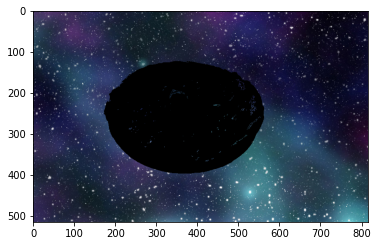

In [29]:
# Load background image, and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#Crop it to the right size (514*816)
crop_background = background_image[0:514, 0:816]

#mask the cropped background so that the pizza are is blocked 
crop_background[mask==0] = [0,0,0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

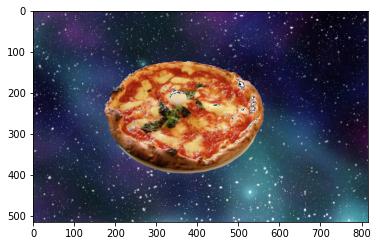

In [30]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)